## Trees & Visualization

### Question 1


Using the "Boston" housing price dataset, predict whether the house value is above the overall median, using a decision tree classifier.

- add a target variable which indicates whether `medv` is above the median
- split the data into 80% train and 20% test
- fit a scikit-learn Decision-Tree Classifier 
- display the test and train confusion matrices

In [1]:
import pandas as pd
boston_df = pd.read_csv("https://raw.githubusercontent.com/JWarmenhoven/ISLR-python/refs/heads/master/Notebooks/Data/Boston.csv")

In [2]:
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

model = DecisionTreeClassifier(random_state=211)

model_data = boston_df.copy()
model_data['medv_high']  = (model_data['medv'] > model_data['medv'].median()).astype(int)
X = model_data.drop(columns=['medv', 'medv_high'])
y = model_data['medv_high']


In [4]:
model_data.groupby('medv_high')['medv'].describe()

,count,mean,std,min,25%,50%,75%,max
medv_high,,,,,,,,
0,256.0,16.062891,4.005182,5.0,13.4,17.1,19.425,21.2
1,250.0,29.158000,8.247260,21.4,23.1,25.0,32.850,50.0


In [5]:
# Split the data, fit the model, make predictions for train and test sets   
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=211)

model.fit(X_train, y_train)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
confusion_matrix(y_train, train_preds)

array([[200,   0],
       [  0, 204]])

Train Confusion Matrix:


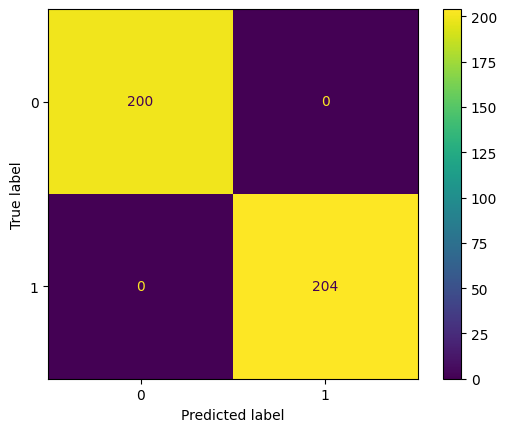

In [7]:
# Display the train confusion matrix
print("Train Confusion Matrix:")
ConfusionMatrixDisplay(confusion_matrix(y_train, train_preds)).plot()

In [8]:
confusion_matrix(y_test, test_preds)

array([[47,  9],
       [ 8, 38]])


Test Confusion Matrix:


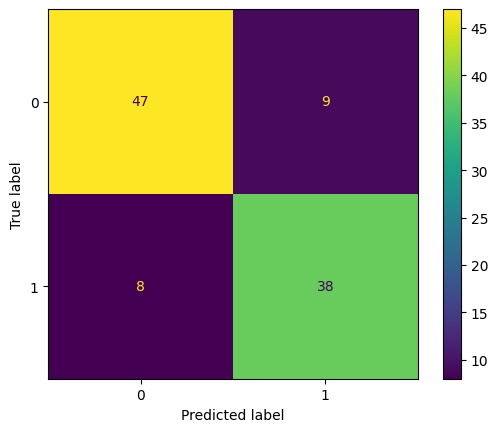

In [9]:
# Display the test confusion matrix
print("\nTest Confusion Matrix:")
ConfusionMatrixDisplay(confusion_matrix(y_test, test_preds)).plot()


The model is a little over-fitted but still makes a good job on predicting, getting most of the predictions correct.

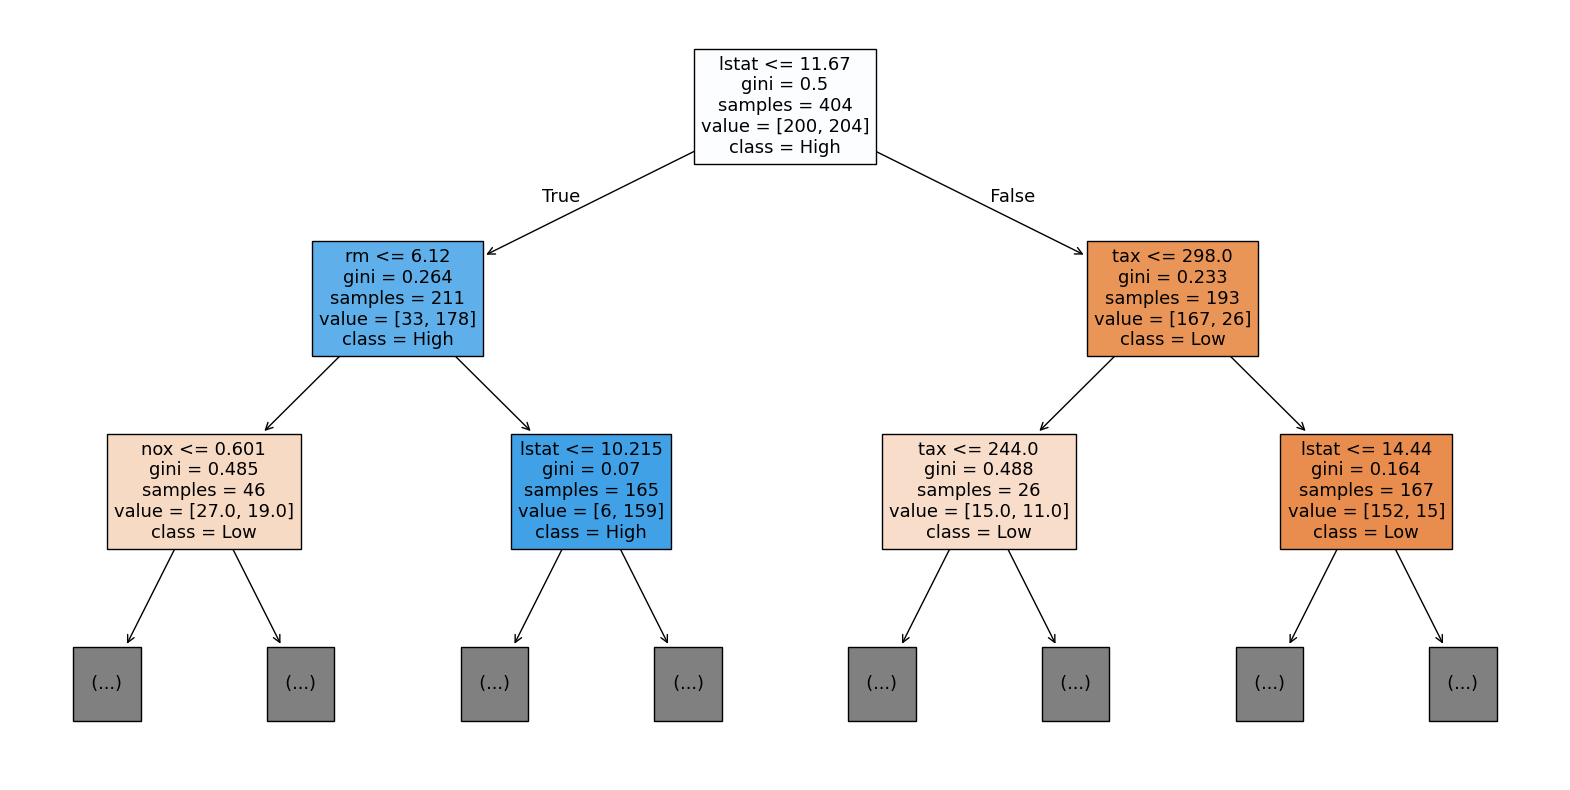

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, 
          feature_names=X.columns,  
          class_names=['Low', 'High'],
          filled=True, 
          max_depth=2) # look at the first two layers
plt.show()

### Question 2

scikit-learn has built-in tools for visualizing trees (`sklearn.tree.plot_tree`), but `dtreeviz` has more features. Fit a smaller decision tree classifier with at most 5 leaf nodes, and visualize the tree produced using dtreeviz. Then answer the following questions:

- What is the first feature the tree splits on? lstat (lower status of the population)
- What is the splitting value for the averge number of rooms feature? 6.12
- For the `nox` (nitrogen oxides concentration) variable, do higher values or lower values lead to a greater proportion of predicted high-price housing?

References:
- https://explained.ai/decision-tree-viz/index.html
- https://github.com/parrt/dtreeviz/blob/master/notebooks/dtreeviz_sklearn_visualisations.ipynb

In [11]:
# %pip install --quiet dtreeviz 

Note: you may need to restart the kernel to use updated packages.


In [12]:
import dtreeviz
from sklearn.tree import DecisionTreeClassifier

small_tree = DecisionTreeClassifier(max_leaf_nodes=5, random_state=211)
small_tree.fit(X_train, y_train)

viz_model = dtreeviz.model(
    small_tree,
    X_train=X_train, 
    y_train=y_train,
    feature_names = list(X.columns),
    target_name= "medv_high",
    class_names=["high", "low"] # This is arbitrary, you can name them anything you like
)


/opt/anaconda3/envs/compss_env/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names


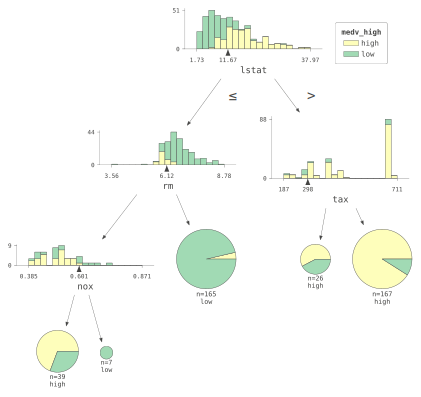

In [13]:
viz_model.view(
    fontname="monospace" # Use a font family which is installed to avoid warnings
) 

### Question 3

Tree visualizations can also be used to show the prediction path for a given observation.
- Produce the prediction path for the observation with index 450
- Which features are used in classifying this observation?
- How many other observations end up in the same leaf node?


In [14]:
viz_model = dtreeviz.model(
    model,
    X_train=X_train, 
    y_train=y_train,
    feature_names = ...
    target_name= ...
    class_names=["high", "low"]
)

viz_model.view(
    x = ...
)

SyntaxError: invalid syntax. Perhaps you forgot a comma? (1169611105.py, line 5)

## Gradient-Boosted Decision Trees

### Question 4

Fit a gradient boosted decision tree (using the efficient implementation in `HistGradientBoostingRegressor`) to predict the taxi fare using all the features except pickup and dropoff times and pickup and dropoff boroughs. Use an 80/20 train-test split.


In [ ]:

import seaborn as sns
from sklearn.ensemble import HistGradientBoostingRegressor

taxis_df = sns.load_dataset('taxis') 


In [ ]:
# Create the training data

...


model = HistGradientBoostingRegressor(
    categorical_features = ...
)
model.fit(X_train,y_train)


In [ ]:
from sklearn.metrics import mean_squared_error
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print(f'Train MSE: {mean_squared_error(y_train, y_train_pred)}')
print(f'Test MSE: {mean_squared_error(y_test, y_test_pred)}')

In [ ]:
import seaborn as sns

sns.scatterplot(x=y_train, y=y_train_pred, label='train')
sns.scatterplot(x=y_test, y=y_test_pred, label='test')

## Hyperparameter search

### Question 5

This model has a large number of hyperparameters which can affect its training performance. We're going to use a cross-validated random search over the three of them to try to find optimal values.

- Use appropriate distributions from scipy.stats to set up the param_distributions
- Run the randomized search CV (this takes a while, if it's running for too long, decrease the n_iter)
- Create a dataframe to store the results
- Find the best-performing set of hyperparameters. What are they? How much better does the model perform with these hyperparameters? How can this information help you improve how you set up the hyperparameter search?

In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
import scipy.stats

param_distributions = {
    # For max_depth, use a distribution that produces integers
    'max_depth': scipy.stats.randint(1, 1000),
    # For max_iter, use a distribution that produces integers
    'max_iter': scipy.stats.randint(1, 1000),
    # For learning rate, use a continuous distribution that produces numbers which are not evenly linearly spaced
    'learning_rate': scipy.stats.loguniform(0.01, 1)
}

search_cv = RandomizedSearchCV(
    HistGradientBoostingRegressor(categorical_features = model_data.columns[model_data.dtypes == 'object']),
    param_distributions=param_distributions,
    n_iter=100,
    random_state=211,
    n_jobs=8,
    #  Specify the appropriate scoring function for mean squared error
    scoring= 'neg_mean_squared_error'
)

search_cv.fit(X_train, y_train)

,estimator,HistGradientB...ype='object'))
,param_distributions,"{'learning_rate': <scipy.stats....t 0x1315820e0>, 'max_depth': <scipy.stats....t 0x130e96a70>, 'max_iter': <scipy.stats....t 0x13127e740>}"
,n_iter,100
,scoring,'neg_mean_squared_error'
,n_jobs,8
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,211
,error_score,nan


In [30]:
results_df = pd.DataFrame(
    search_cv.cv_results_
)
results_df.sort_values('mean_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,0.013948,0.004716,0.001003,0.000405,0.029373,555,18,"{'learning_rate': 0.029373272949601327, 'max_d...",-0.151769,-0.142759,-0.153944,-0.143720,-0.153102,-0.149059,0.004811,100
8,0.015842,0.006973,0.001122,0.000661,0.036504,752,19,"{'learning_rate': 0.03650354668773165, 'max_de...",-0.136709,-0.127136,-0.138936,-0.128629,-0.138629,-0.134008,0.005081,99
96,0.241358,0.028052,0.005457,0.002299,0.921265,836,395,"{'learning_rate': 0.9212647845017673, 'max_dep...",-0.141549,-0.125232,-0.126238,-0.119690,-0.102245,-0.122991,0.012659,98
75,0.054182,0.005734,0.001161,0.000018,0.011074,970,85,"{'learning_rate': 0.011074346476838175, 'max_d...",-0.122746,-0.111693,-0.126421,-0.115237,-0.125742,-0.120368,0.005878,97
1,0.108255,0.012900,0.002384,0.000468,0.869597,811,204,"{'learning_rate': 0.869596815155094, 'max_dept...",-0.128414,-0.105965,-0.128076,-0.092391,-0.131365,-0.117242,0.015404,96


In [28]:
mse_improvement = (20.40-17.87)/20.40
mse_improvement

0.12401960784313715

# Visualizing Decision Regions in  Feature Space

### Question 6

We've seen examples of classification boundaries in abstract diagrams and from ISLP. Let's compare the shapes of the decision boundaries for three classification models: Logistic Regression, KNN and a decision tree.

- Train a KNN, linear model, and decision tree classifier to predic species from sepal length and sepal width on the iris dataset
- Produce a dataframe which contains all the values in a grid defined by the ranges of the predictors
- Make predictions for this space using each mode
- Visualize the results using a scatterplot and a 2-dimensional KDE plot
- What is notable about the differences between the shapes of these decision regions?

In [ ]:
import seaborn as sns 

iris_df = sns.load_dataset('iris')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


linear_model = ...
knn_model = ...
tree_model = ...

# Train the three models
# Train the three models
...

In [ ]:
import numpy as np

sepal_length_range = np.linspace(iris_df['sepal_length'].min(), iris_df['sepal_length'].max(), num=30)
sepal_width_range = np.linspace(iris_df['sepal_width'].min(), iris_df['sepal_width'].max(), num=30)

rows = []

#  Write a nested for loop over the sepal width and the sepal length
#  In each iteration of the inner loop, append to `rows` a dict where the keys are the feature names
#  and the values are the feature values in the grid
for l in sepal_length_range: 
    for w in sepal_width_range:
        rows.append({'sepal_length': l, 'sepal_width': w})

# Now, convert that list of dicts into a dataframe
space_df = pd.DataFrame(rows)


space_df['y_pred_knn'] = knn_model.predict(space_df[['sepal_length', 'sepal_width']])
space_df['y_pred_logistic'] = linear_model.predict(space_df[['sepal_length', 'sepal_width']])
space_df['y_pred_decision_tree'] = tree_model.predict(space_df[['sepal_length', 'sepal_width']])


In [ ]:
# Scatterplot of the original data
sns.scatterplot(data=model_data, x='sepal_length', y='sepal_width', hue='species', hue_order=['setosa', 'versicolor', 'virginica'])

In [ ]:
sns.kdeplot(data=space_df, x='sepal_length', y='sepal_width', hue='y_pred_logistic', hue_order=['setosa', 'versicolor', 'virginica'])
sns.scatterplot(data=space_df, x='sepal_length', y='sepal_width', hue='y_pred_logistic', hue_order=['setosa', 'versicolor', 'virginica'])

In [ ]:
sns.kdeplot(data=space_df, x='sepal_length', y='sepal_width', hue='y_pred_knn', hue_order=['setosa', 'versicolor', 'virginica'])
sns.scatterplot(data=space_df, x='sepal_length', y='sepal_width', hue='y_pred_knn', hue_order=['setosa', 'versicolor', 'virginica'])

In [ ]:
sns.kdeplot(data=space_df, x='sepal_length', y='sepal_width', hue='y_pred_decision_tree', hue_order=['setosa', 'versicolor', 'virginica'])
sns.scatterplot(data=space_df, x='sepal_length', y='sepal_width', hue='y_pred_decision_tree', hue_order=['setosa', 'versicolor', 'virginica'])

## Additional Questions

### Question 

Gradient-Boosted Decision trees are the go-to model for many problems, and as such different implementations are under active development. Compare the performance of scikit-learn's `HistGradientBoostingClassifier` to the implementations in xgboost, lightgbm, and CatBoost.




### Question

Following [this tutorial](https://ax.dev/versions/0.3.5/tutorials/tune_cnn_service.html), use ax's model-based black-box optimization to tune the hyperparameters for the taxi fare GBDT. Do the same using lightGBM and the [optuna LightGBMTuner](https://optuna.readthedocs.io/en/v2.0.0/reference/generated/optuna.integration.lightgbm.LightGBMTuner.html).


### Question

Write a boosting regressor which uses linear regression as the base model. How does this compare to fitting linear regression directly on multiple features?

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)